# 👀 Projet OCR

Votre client souhaiterait extraire les tableaux de données des CRA (Compte-Rendu d'Activite). Ce type de document est complexe, il s'agit souvent de document format PDF de nombreuses pages, avec du texte mais également éléments des tableaux de chiffre qu'il serait intéressant de comparer pour faire des prédictions et évaluer les métriques par rapport aux attentes.


Pour ce faire vous devrez utiliser les techniques d'OCR pour récupérer les données des fichiers PDF, puis de stocker ces données tabulaires dans un système de gestionnaire de bases de données relationnelles (par exemple MySQL).

# Import

In [1]:
#import

from PIL import Image
import pytesseract
from pdf2image import convert_from_path
from sqlalchemy import create_engine
import pandas as pd
import cv2
import pdfplumber
import tabula
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1️⃣ Table extraction - data.pdf

In [9]:
# open & view pdf file
def view_pdf (pdf_file):
    open_pdf = pdfplumber.open(pdf_file).pages[0]
    img_pdf = open_pdf.to_image()
    return img_pdf

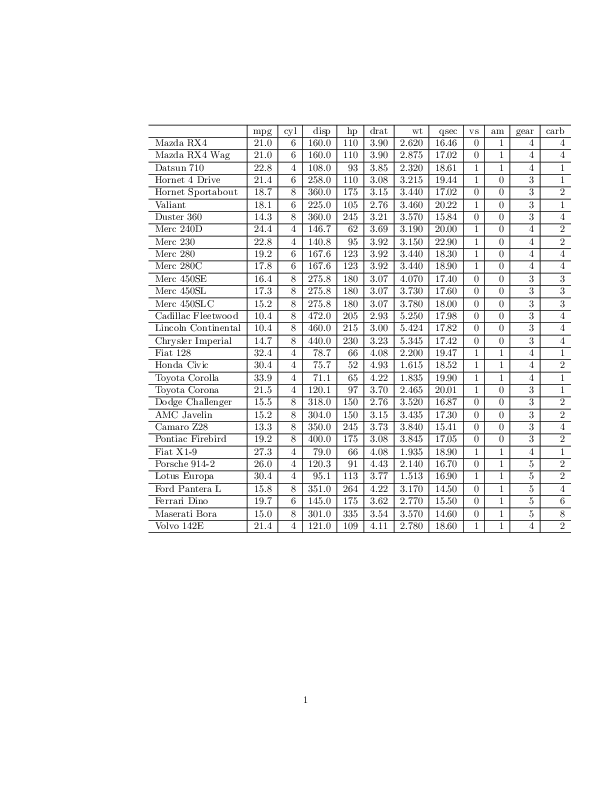

In [4]:
view_pdf("data/data.pdf")

**with PDFPlumber**

In [6]:
# extract with PDFPlumber
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "text"
}

pdf = pdfplumber.open("data/data.pdf")
table=pdf.pages[0].extract_table(table_settings)
df = pd.DataFrame(table[1::],columns=table[0])

In [7]:
df

,,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [89]:
# export dataframe to CSV
df.to_csv(r'ocr1.csv', index = False)

In [90]:
# load dataset
ocr1 = pd.read_csv('ocr1.csv')

**with Tabula**

In [11]:
# extract with Tabula
df = tabula.read_pdf("data.pdf", pages='all', stream= True, multiple_tables=True)

In [12]:
#def convert_pdf(pdf_file,number):
#    df = tabula.read_pdf(pdf_file, pages='all', stream= True, multiple_tables=True)
#    return df[number]

In [13]:
# first Species's table
df[1]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [94]:
#second Species's table
df[2]

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,145,6.7,3.3,5.7,2.5,virginica
1,146,6.7,3.0,5.2,2.3,virginica
2,147,6.3,2.5,5.0,1.9,virginica
3,148,6.5,3.0,5.2,2.0,virginica
4,149,6.2,3.4,5.4,2.3,virginica
5,150,5.9,3.0,5.1,1.8,virginica


In [95]:
# remove unused column Unnamed: 0
df[2].drop(['Unnamed: 0'], axis=1, inplace=True)

In [96]:
# last table on data.pdf
df[3]

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


# 1️⃣ Export to SQL - data.pdf

In [29]:
# upload dataframe in SQL base
def con_sql(dataframe,tablesql):
    hostname="127.0.0.1"
    dbname="ocr"
    uname="root"
    pwd="pixel"
    engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
    dataframe.to_sql(tablesql, engine, index=False)

In [99]:
# upload dataframe in SQL base
con_sql(df[1],"ocr1")
con_sql(df[2],"ocr2")
con_sql(df[3],"ocr3")

# 2️⃣ Table extraction - test1.pdf

**with Tabula**

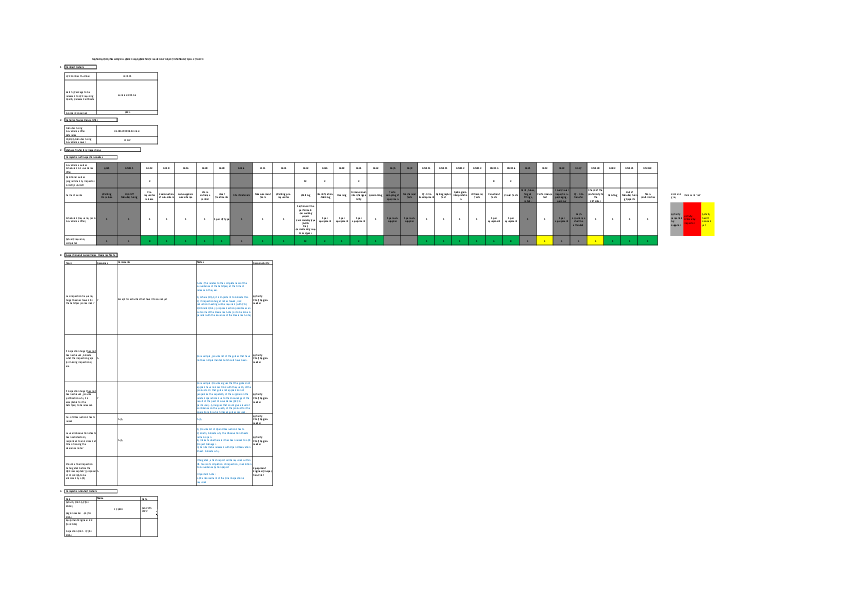

In [10]:
view_pdf("data/test1.pdf")

In [13]:
def extract_table(pdf_file,position,transpose,header):
        # pdf_file argument mean the path to the location of your file to convert
    with pdfplumber.open(pdf_file) as pdf:
        first_page = pdf.pages[0].find_tables()
        # position argument represente the place of the dataset in order in your pdf
        df = first_page[position].extract()
        df = pd.DataFrame(df)
        # loop for place or not the first row as a header for the column name of dataset
        if transpose == True:
            df = df.transpose()
        else:
            None
        if header == True :
            new_header = df.iloc[0] #grab the first row for the header
            df = df[1:] #take the data less the header row
            df.columns = new_header #set the header row as the df header
        else:
            None       
        
    return df

In [15]:
# table 1
table1 = extract_table("data/test1.pdf",0,True,True)
table1

,HPC Contract Number,Batch / Package to be \nreleased to HPC requiring \nQuality Release Certificate,Supplier Concerned
1,UK4101,Bundle B-001 bis,REEL


In [21]:
# table 2
table2 = extract_table("data/test1.pdf",1,True,True)
table2

,Manufacturing \nSurveillance Offer \nReference,DI/EIRA Manufacturing \nSurveillance Level
1,D309520005884 ind.B,DI SL2


In [23]:
# table 3
table3= extract_table("data/test1.pdf",2,True,True)
table3

,Surveillance Guides \nScheduled in Surveillance \nOffer,Additional Guides \nprogrammed by Inspector \nin IWO/Sub-IWO,Name of Guide,Scheduled Frequency (as in \nSurveillance Offer),Actual Frequency \ncompleted
1,A521,,Welding \nProcedure,1,0
2,BM901,,Kick-Off \nManufacturing,1,0
3,B512,3,Pre-\nrequisites \nrelease,1,4
4,B514,,Examination \nof sub-orders,1,1
5,B516,,Sub-suppliers \nsurveillance,1,1
6,B524,,Store \nentrance \ncontrol,1,1
7,B534,,Heat \nTreatments,1 per HT type,1
8,B598,,Filler Materials,1,0
9,E900,,Measurement \nTools,1,1
10,B551,,Welding pre-\nrequisites,1,1


In [31]:
# table 4
table3= extract_table("data/test1.pdf",4,False,True)
table3

,Topic,Response,Comments,Notes,Responsibility
1,Has inspection frequency \ntarget been achieve...,Y,Except for activities that haven't occured yet,Note: This relates to the completeness of the ...,Activity \nPilot/Region \nLeader
2,"If inspection target has not \nbeen achieved, ...",N,,"For example, provide list of the guides that h...",Activity \nPilot/Region \nLeader
3,"If inspection target has not \nbeen achieved, ...",Y,,For example: Provide argues that the guides no...,Activity \nPilot/Region \nLeader
4,No. of Observation Sheets \nraised,,N/A,N/A,Activity \nPilot/Region \nLeader
5,Have all observation sheets \nbeen satisfactor...,,N/A,1) Provide list of Open Observation Sheets.\n2...,Activity \nPilot/Region \nLeader
6,Should a final Inspection \nbe targeted before...,N,,"If targeted, a flash report will be required w...",Equipment \nEngineer/Inspec\ntion Pilot


In [32]:
# table 5
table5= extract_table("data/test1.pdf",5,False,True)
table5

,Role,Name,Date
1,Activity Pilot -AP (for \nEMIB)\nRegion Leader...,S.FREDJ,Feb 22th \n2022
2,Equipment Engineer -EE \n(for EMIB)\nInspectio...,,


In [18]:
# rename column in dataframe
def rename_title(dataframe,oldname,newname):
    dataframe.rename(columns={oldname: newname}, inplace=True)
    return dataframe

In [17]:
# rename column in table1
rename_title(table1,"Batch / Package to be \nreleased to HPC requiring \nQuality Release Certificate", "Quality Release Cert" )

,HPC Contract Number,Quality Release Cert,Supplier Concerned
1,UK4101,Bundle B-001 bis,REEL


In [22]:
# rename column in table2
rename_title(table2,"Manufacturing \nSurveillance Offer \nReference", "Reference")
rename_title(table2,"DI/EIRA Manufacturing \nSurveillance Level", "Surveillance Level")

,Reference,Surveillance Level
1,D309520005884 ind.B,DI SL2


In [25]:
# rename column in table3
rename_title(table3,"Surveillance Guides \nScheduled in Surveillance \nOffer", "Offer")
rename_title(table3,"Additional Guides \nprogrammed by Inspector \nin IWO/Sub-IWO", "Sub-IWO")
rename_title(table3,"Scheduled Frequency (as in \nSurveillance Offer)", "Scheduled Frequency")
rename_title(table3,"Actual Frequency \ncompleted)", "Actual frequency completed")

,Offer,Sub-IWO,Name of Guide,Scheduled Frequency,Actual Frequency \ncompleted
1,A521,,Welding \nProcedure,1,0
2,BM901,,Kick-Off \nManufacturing,1,0
3,B512,3,Pre-\nrequisites \nrelease,1,4
4,B514,,Examination \nof sub-orders,1,1
5,B516,,Sub-suppliers \nsurveillance,1,1
6,B524,,Store \nentrance \ncontrol,1,1
7,B534,,Heat \nTreatments,1 per HT type,1
8,B598,,Filler Materials,1,0
9,E900,,Measurement \nTools,1,1
10,B551,,Welding pre-\nrequisites,1,1


# 2️⃣ Export to SQL - test1.pdf

In [34]:
# upload dataframe in SQL base
con_sql(table1,"table1")
con_sql(table2,"table2")
con_sql(table3,"table3")
con_sql(table5,"table5")

# 3️⃣ Table extraction - test2.pdf

**with Tesseract**

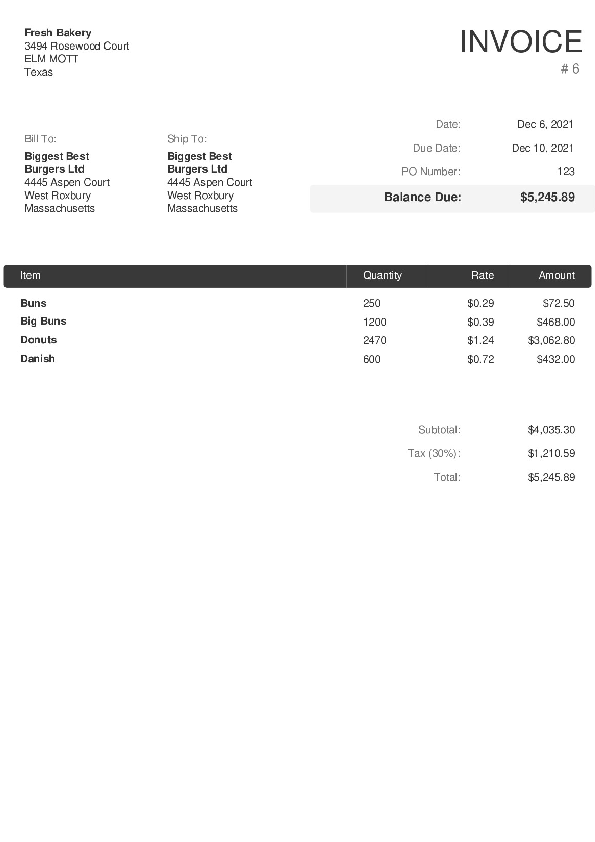

In [29]:
view_pdf("test2.pdf")

In [17]:
# load tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\veron\anaconda3\envs\tesseract\Library\bin\tesseract.exe'

In [18]:
# export pdf to jpg
pdfs = r"test2.pdf"
pages = convert_from_path(pdfs, 350)

i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1   

In [28]:
# plot image in gray or RGB
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# define .jpg
image = cv2.imread("Page_1.jpg", cv2.IMREAD_GRAYSCALE) 

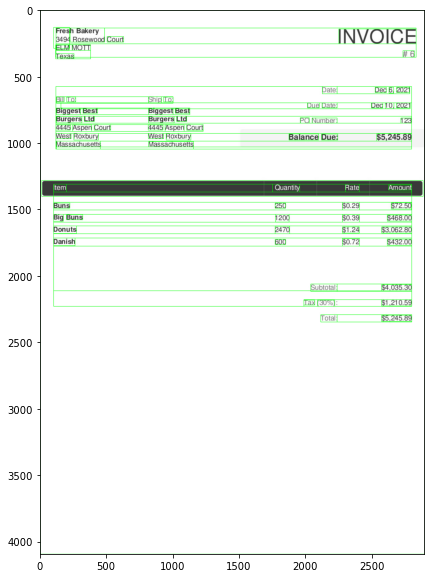

In [29]:
# view .jpg with boxes
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)